Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu=0
sigma=1
k=[1,2,3,10,100]
y=np.zeros(1000)

for i in range(len(k)):
  for j in range(k[i]):
    x = np.random.normal(mu,sigma,1000)
    y += x**2
  
  fig = plt.figure()
  plt.title('y (k=%d)'%k[i])
  plt.xlabel('Value')
  plt.ylabel('PDF')
  plt.hist(y)
  plt.show


Question 2

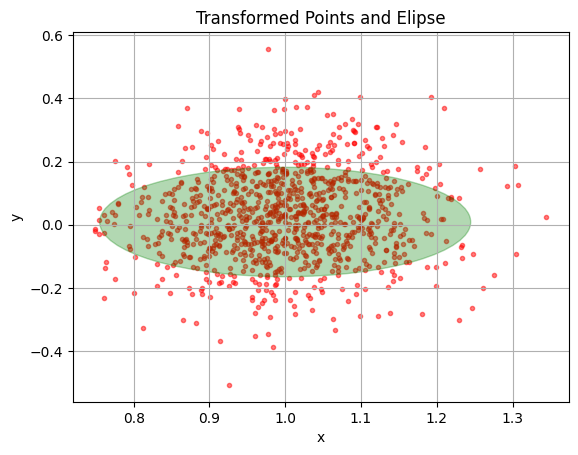

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# defining x
rho=1
theta=np.deg2rad(0.5) 
x=(rho*np.cos(theta), rho*np.sin(theta)) #mean of normal

# creating covariance
sigma_x=np.zeros((2,2))
sigma_y=np.zeros((2,2))
sigma_x[0,0]=0.01
sigma_x[1,1]=0.005

# defining normal distribution
samples = np.random.multivariate_normal(x, sigma_x, size=1000)

# defining jacobian
y = np.column_stack([samples[:, 0] * np.cos(samples[:, 1]-rho*samples[:, 1]*np.sin(samples[:, 1])), samples[:, 0] * np.sin(samples[:, 1])+rho*samples[:, 1]*np.cos(samples[:, 1])])

# defining covariance of y
sigma_y[0,0]=((sigma_x[0,0])*np.cos(theta)**2)+((sigma_x[1,1])*(rho**2)*(np.sin(theta)**2))
sigma_y[0,1]=(sigma_x[0,0])*np.sin(theta)*np.cos(theta)-(sigma_x[1,1])*(rho**2)*np.sin(theta)*np.cos(theta)
sigma_y[1,0]=sigma_y[0,1]
sigma_y[1,1]=((sigma_x[0,0])*np.sin(theta)**2)+((sigma_x[1,1])*(rho**2)*(np.cos(theta)**2))

# calculating eigen values and vectors
eigenvalues, eigenvectors = np.linalg.eig(sigma_y)
angle=np.arctan2(eigenvectors[0][1],eigenvectors[0][0])

# plots
fig, ax = plt.subplots()
ax.scatter(y[:, 0], y[:, 1], marker='.', color='red', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Transformed Points and Elipse')
ax.grid(True)


s=np.sqrt(5.991)
width = 2 * np.sqrt(eigenvalues[0])*s
height = 2 * np.sqrt(eigenvalues[1])*s

angle=np.arctan2(eigenvectors[0][1],eigenvectors[0][0])

ellipse = Ellipse((rho*np.cos(theta), rho*np.sin(theta)), width, height, color='green', angle=angle, alpha=0.3)
ax.add_patch(ellipse)

plt.show()